# Euler methods


## Introduction

In this part of the course we discuss how to solve ordinary differential equations (ODEs). Although their numerical resolution is not the main subject of this course, their study nevertheless allows to introduce very important concepts that are essential in the numerical resolution of partial differential equations (PDEs).

The ODEs we consider can be written in the form:

```{math}
:label: eq:ODE
  y^{(n)}=f(t, y, \dots, y^{(n-1)}),
```

where $y=y(t)$ is a function of the variable $t$ and $y^{(n)}$ represents the n-th derivative of $y$ with respect to $t$:

```{math}
  y^{(n)}=\frac{d^n y}{dt^n}.
```

When $f$ does not depend explicitly on time, we qualify the problem as *autonomous*.

Note that we have used $t$ as the variable on which the unknown function $y$ depends and we will usually refer to it as *time*. However, all the methods we describe in this chapter also apply to other problems in which a given function depends on an independant variable and the corresponding ODE has the form {eq}`eq:ODE`.

As an example and toy problem, let us consider radioactive decay. Imagine we have a sample of material containing $N$ unstable nuclei at a given initial time $t_0$. The time evolution of $N$ then follows an exponential decay law:

```{math}
:label: eq:decay
  \frac{dN(t)}{dt}=-\alpha N(t).
```

where $\alpha>0$ is a constant depending on the type of nuclei present in the material. Of course, we don't really need a computer to solve this equation as its solution is readily obtained and reads:

```{math}
:label: eq:expDecay
  N(t)=N(t_0)e^{-\alpha t}
```

However, our objective here is to obtain the above time evolution using a numerical scheme.

## The forward Euler method

The most elementary time integration scheme - we also call these 'time advancement schemes' - is known as the forward (explicit) Euler method - it is actually member of the Euler family of numerical methods for ordinary differential equations. We use it to introduce several fundamental concepts that will pop up frequently in the rest of the course. This scheme is based on computing an approximation of the unknown function at time $t+dt$ from its known value at time $t$ using the Taylor expansion limited to the first two terms. We then have:

```{math}
:label: eq:ForwardEuler
N(t+dt) \equiv N(t) + N'(t)dt \;\;\;\; \textrm{Forward Euler method}
```

From this equation, we note that the forward Euler method is of second order for going from $t$ to $t+dt$ (the dropped term in the Taylor expansion is $O(dt^2)$). Once the value of $N$ is known at time $t+dt$, one can re-use {eq}`eq:ForwardEuler` to reach time $t+2dt$ and so on.

Schematically, we therefore start the time marching procedure at the initial time $t_0$ and make a number of steps (called time steps) of size $dt$ until we reach the final desired time $t_f$. In order to do this, we need $n_t = (t_f - t_i)/dt$ steps.

By convention, we denote the different intermediate times as $t^n = t_0+ndt$ and the corresponding values of $N$ as $N^n = N(t_0+ndt)$ so that $N^n = N(t^n)$.

The forward Euler scheme is then alternatively written as:

```{math}
:label: eq:ForwardEuler2
N^{n+1} \equiv N^n + N^{'n} dt \;\;\;\; \textrm{Forward Euler method}
```

Let's write a Python code for that. First, we perform some imports.

In [1]:
import numpy as np

Now let's set some constant parameters for our problem. In real-world codes, constant parameters are usually separated from the main code. They are either put in a separate module, or set in an inputfile. At this stage, let's just isolate them in a separate cell.

In [2]:
alpha = 0.25 # Exponential law coefficient
ti = 0.0     # Initial time
tf = 5.0     # Final time
dt = 0.5     # Time step
Ni = 100     # Initial condition

Now we can write a code for the actual numerical procedure.

In [3]:
# First, we compute the number of steps.
# Note that the number of steps must
# be an integer, but the time data
# we construct it from is of float type.
# We therefore need to use the int() function.
# It converts the input data to an
# integer. If a float is provided as an input,
# it disregards the decimals. For example,
# int(5.0/2.0) returns 2.
nt = int((tf-ti)/dt)

# Then we create an empty numpy array for
# the intermediate values of N, including
# those at ti and tf.
#
# You may wonder, how can a piece of numerical
# data be empty or not empty? But here
# it is rather a conventional term used
# to indicate that the values have not been
# initialized - set to 0. It means that they
# can have any value in a range allowed by the
# numerical precision. Initializing takes time so unless
# you need an array of zeros, np.empty is preferable
# over np.zeros.
N = np.empty(nt+1)

# We pass the initial condition to the N array,
N[0] = Ni

# and perform the time stepping:
for i in range(nt):
    N[i+1] = N[i] - alpha*N[i]*dt

Done! The last entry in the array N now contains an estimate for $N(t_f)$.

### Numerical accuracy of the forward Euler method

Let us compare graphically our numerical values with the exact solution {eq}`eq:expDecay`. For that purpose we use again the matplotlib package:

In [4]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('../styles/mainstyle.use')

In [5]:
# In this cell, we compute the
# exact solution of the differential
# equation.
#
# numpy.arange builds a sequence of numbers. It
# is similar to the Python's standard
# range function, BUT, unlike it, it can
# operate not only on integers, but also
# floats, and its return type is a numpy
# native array.
#
# For more info:
# https://numpy.org/doc/stable/reference/generated/numpy.arange.html
t = np.arange(nt+1) * dt

# We are all set to build the exact solution array.
Nexact = Ni * np.exp(-alpha*t)

When you're *debugging* - developing, testing and optimizing your code, it is always a good idea to have your imports and setup of *constant parameters* separated from the code you're working on. The same stands for the actual computations and visualization. Imaging, you build your arrays of data in the same cell as you plot it. You see a plot and you don't like the font, you rerun the cell, and then you think that it might be a good idea to cut the x-axis, you rerun the cell again. In such a way, each time you update your plot, you will recompute absolutely the same numpy array. If the array takes a lot of time to compute, you will lose a lot of time. For small examples, this is *not catastrophic, but considered to be a poor organization of a code*.

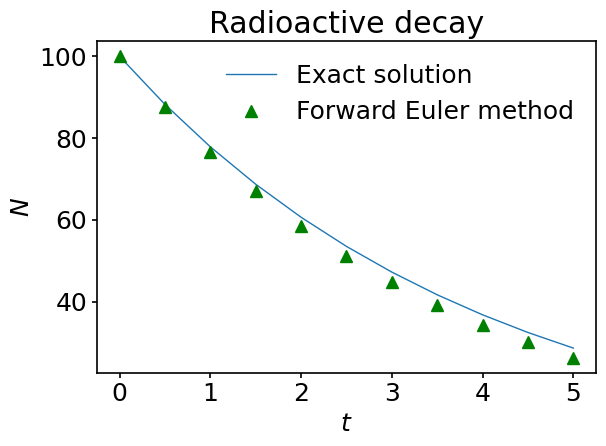

In [6]:
# Create a figure with a single subplot
fig, ax = plt.subplots()

# Plot the exact solution. Set the linestyle.
# Matplotlib supports multiple line- and
# markerstyles. For the linestyles see
# https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/linestyles.html
# For the markers see
# https://matplotlib.org/3.3.1/api/markers_api.html
#
# Note, though, that here we specify linestyle
# as '-' (equivalent to 'solid') for infor-
# mative purposes. Solid linestyle is the default one,
# so, if you remove the linestyle specification here,
# the plot won't change.
#
# We also assign a label to the curve. A label is
# a string, which we want to be displayed in a
# legend.
ax.plot(t, Nexact, linestyle='-', label='Exact solution')

# Plot the approximate solution. You can see that
# here we specify the appearance of the markers
# without using the keyword 'marker'. We let
# Python figure out which argument we are setting
# by its position. There are POSITIONAL and
# KEYWORD arguments in Python functions. Posi-
# tional arguments must obey a certain order, so
# that it is clear which of the parameters they
# stands for. Keyword arguments are passed with the keywords.
# For example, we can write color='green',
# where color is a keyword argument. Sometimes
# keyword arguments can be passed as positional ones
# if you follow the E X A C T order provided in the implemen-
# tation of a function.

# For more info
# https://problemsolvingwithpython.com/07-Functions-and-Modules/07.07-Positional-and-Keyword-Arguments/
ax.plot(t, N, '^', color='green', label='Forward Euler method')

# We set labels for the axes and a title for the subplot.
ax.set_xlabel('$t$')
ax.set_ylabel('$N$')
ax.set_title('Radioactive decay')

# Make the legend visible.
ax.legend()

# And we save the whole figure to the specified
# location in the default png format.
# If you don't put .png suffix, the plot will
# still be saved as a png image. The keyword argument
# dpi defines resolution of your image. It is lite-
# rally 'dots per image' - 300 is good enough for
# a scientific paper, no need to go to extremes.
#
# Btw, as you've saved your figure once, it is a good
# idea to comment the line, so that you don't save
# the same image over and over, unless you modify the
# plot.
fig.savefig('../figures/radioactiveDecay.png', dpi=300)

The agreement between the exact solution and the approximate one is rather good. However, it degrades with time. Why so? The answer, of course, comes from the error introduced by cutting the Taylor series in the definition of the forward Euler scheme, and we know things should improve if we reduce $dt$ but this will come at the expense of increasing the total number of time steps and the computational cost. To get an idea about this, run the previous code with a smaller and smaller time step and see what happens to the curves.

To analyze this from the quantitative point of view, let us redo the computation using several values of $dt$ and compare the error made in estimating $N(t_f)$. In the following piece of code, we only store the value of $N$ at $t_f$.

In [7]:
# Create a list containing the set of
# time steps, so that each time step is one half
# of the previous one.
dt_list = np.array([0.5/2**k for k in range(5)])

# Create an array to store the values of
# N(tf) for the different time steps.
# numpy.empty_like returns the array with
# values non-initialized, just like numpy.empty,
# but, unlike numpy.empty, it takes as a para-
# meter not an integer, but either a sequence,
# or a numpy array - array-like in the termi-
# nology of numpy. The output array will have
# the same shape and type as an input data.
values = np.empty_like(dt_list)

# Now we want to loop over all values in
# dt_list. We also want to count our itera-
# tions, as if we were extracting indices of
# the elements of dt_list. We could create some
# variable i=0 (indexing in Python and most of
# the others programming languages starts with
# 0), and then increase it by 1 at each iteration,
# like this:
#
# i = 0
# for dt in dt_list:
#    (do something...)
#    i += 1
#
# But the moral here is WHY BOTHER. In this case,
# and in many others, Python developers already
# have implemented what we need: the enumerate fun-
# ction. It counts the elements in an iterable object
# and returns the counter at each iteration.

for i, dt in enumerate(dt_list):
    # Copy initial condition into the variable,
    # which we are going to advance for each size
    # of dt.
    N = Ni

    nt = int((tf-ti)/dt)

    # Be careful not to shadow the variables of
    # the exterior loop - i and dt - with the
    # variables of the interior loop. We set it
    # to be j.
    for j in range(nt):
        N = N - alpha*N*dt

    # Save the final N to the values array
    # at the end of each time marching
    values[i] = N

Let's now compute and plot the difference between all the computed $N(t_f)$ and the exact solution.

In [8]:
# We construct the array containing the differences
# between approximated and exact final solutions
# for each size of time step considered in dt_list.
error = np.abs(values-Ni*np.exp(-alpha*tf))

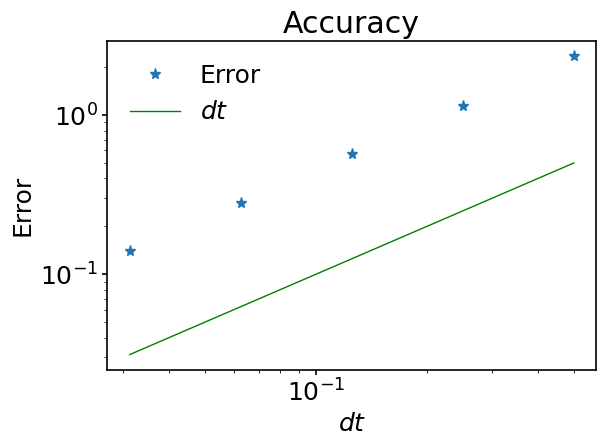

In [9]:
fig, ax = plt.subplots()

# Plot the error in logarithmic scale and see
# that it grows as time step increases.
ax.loglog(dt_list, error, '*', label='Error')

# Fit a slope to the previous curve and see
# that as they are parallel, the error after
# nt time steps is proportional to dt (not dt**2).
ax.loglog(dt_list, dt_list, color='green', label='$dt$')

ax.set_xlabel('$dt$')
ax.set_ylabel('Error')
ax.set_title('Accuracy')

# Add a legend to the plot. Note how we added a semi-
# colon at the end of the statement. This removes an
# unnecessary ipython output just below the cell.
# Remove it and see the difference.
ax.legend();

# fig.savefig('../figures/eulerSlope.png', dpi=300)

Do you notice something 'surprising' in this plot? Earlier we mentioned an accuracy of second order for the forward Euler method but here we observe an accuracy of first order. In fact, there is a straightforward explanation for this. We said "...that the forward Euler method is of second order for going from $t$ to $t+dt$". Here we are comparing values after $N$ time steps with $\displaystyle N=\frac{t_f-t_i}{dt}$. The total error is proportional to the product of the error made at each time step multiplied by the number of steps. As the latter scales as $dt^{-1}$, the total error scales like $dt^2 / dt = dt$. One says that **the error made during one time step accumulates during the computation**.

### Numerical stability of the forward Euler method

For the radioactive decay equation, the forward Euler method does a decent job: when reducing the time step, the solution converges to the exact solution, albeit only with first-order accuracy. Let us now focus on another crucial property of numerical schemes called *numerical stability*.

For the problem of radioactive decay, we first observe that according to equation {eq}`eq:ForwardEuler2` we have:

```{math}
:label: eq:demo_stability
    N^{n} = (1-\alpha dt)N^{n-1}  = (1-\alpha dt)^2 N^{n-2}= \dots = (1-\alpha dt)^{n}N_{0}
```

Equation {eq}`eq:demo_stability` implies that $N^n\to \infty$ if $\vert 1-\alpha dt \vert^n \to \infty$. In such a case the numerical scheme is called *unstable* - i.e when solution grows unbounded (blows up in the jargon). On the other hand, in the case $\vert 1-\alpha dt \vert \le 1$, the Euler scheme is said to be stable. This requirement limits the time step allowed when performing the numerical integration.

In many problems, the coefficients of the equations are complex (e.g. Schrödinger equation). If we generalize our radioactive decay problem to allow for complex valued coefficients,
```{math}
 \frac{dy}{dt} = \lambda y
```
with $\lambda=\lambda_r + i\lambda_i$, the criteria for stability of the forward Euler scheme becomes,

```{math}
:label: eq:complex_stability
  \vert 1+\lambda dt \vert \le 1 \Leftrightarrow (1+\lambda_rdt)^2+(\lambda_idt)^2 \le 1.
```

Given this, one can then draw a stability diagram indicating the region of the complex plane $(\lambda_rdt , \lambda_idt)$, where the forward Euler scheme is stable. From {eq}`eq:complex_stability`, we conclude that the bounded region of stability *is a circle* centered around $(-1,0)$.

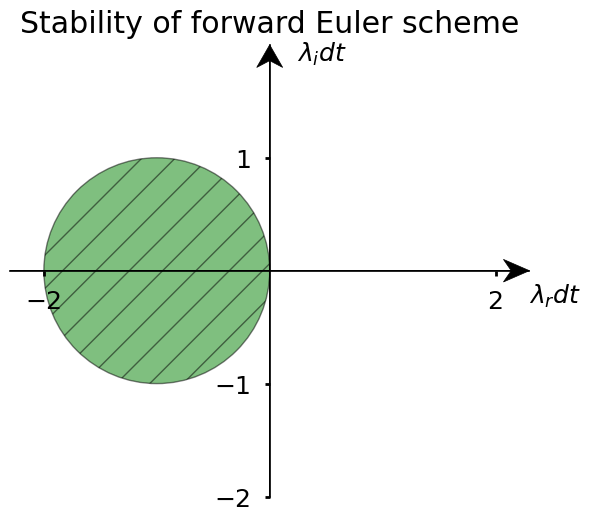

In [10]:
# Let's configure the size of the figure
# (in inches) to make it a square and bigger.
fig, ax = plt.subplots(figsize=(6, 6))

# We draw a circle and customize it a bit. You
# can see that because of some reason the fun-
# ction name here starts with a capital letter -
# Circle. That's because matplotlib.pyplot.Circle
# is not really a function. It is an object called a
# c l a s s in Python. We won't dig into classes
# at this stage, but what it means for us here?
# Well, when we call the class by its name, we
# are actually calling its c o n s t r u c t o r -
# in-class function (method), which returns an
# i n s t a n c e of the class.
# In this way, we have the instance of a class -
# circle, which we have to add to the subplot
# somehow. Otherwise, the figure and circle are
# fully separated from each other, circle s t a n d s
# a l o n e from the whole drawing.
#
# For more info on the Circle class
# https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.patches.Circle.html
circle = plt.Circle((-1, 0), 1, ec='k', fc='green', alpha=0.5, hatch='/')

# There is a method of the Axes object, which is res-
# ponsible for exactly what we need - adding
# an Artist object to the plots. Yes, Circle ori-
# ginates from another generic object - Artist.
# Generally speaking, most of drawable objects in
# Matplotlib originate from the Artist class. So, if we
# wanted to go exotic, we could even have added
# our lines through add_artist, instead of using
# plot.
#
# For more info
# https://matplotlib.org/3.1.1/api/artist_api.html#matplotlib.artist.Artist
ax.add_artist(circle)

# We make sure that the scaling for the x-axis
# is the same as for the y_axis.
#
# For more info
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_aspect.html
ax.set_aspect(1)

# We move the axes drawn on the left and
# on the bottom of the subplot to the center,
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
# And hide the pieces of the subplot's frame
# which are on the right and on top.
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# See that Python's syntax allows creation
# of few variables at a time.
xmin, xmax = -2.3, 2.3
ymin, ymax = -2., 2.

ax.set_xlim(xmin ,xmax)
ax.set_ylim(ymin, ymax)

# Let's complement our plot with arrows. We won't
# dig into details of how arrows are configured, as
# you already have enough knowledge to figure it out
# yourself.
#
# For more info
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.arrow.html
ax.arrow(xmin, 0., xmax-xmin, 0., fc='k', ec='k', lw=0.5,
         head_width=1./20.*(ymax-ymin), head_length=1./20.*(xmax-xmin),
         overhang = 0.3, length_includes_head= True, clip_on = False)

ax.arrow(0., ymin, 0., ymax-ymin, fc='k', ec='k', lw=0.5,
         head_width=1./20.*(xmax-xmin), head_length=1./20.*(ymax-ymin),
         overhang = 0.3, length_includes_head= True, clip_on = False)

# Let's set location for the axes labels, and
# change the orientation of the label of the y-
# axis - by default it is 90.
ax.set_xlabel(r'$\lambda_r dt$')
ax.set_ylabel(r'$\lambda_i dt$', rotation=0)

ax.yaxis.set_label_coords(0.6, 0.95)
ax.xaxis.set_label_coords(1.05, 0.475)

ax.set_title('Stability of forward Euler scheme', y=1.01)

# Let's configure the ticks of the axes. The
# most straightforward way of doing it is to
# pass locations of the ticks explicitly.
#
# You also can pass the ticklabels you want
# using set_ticklabels method.
ax.set_xticks((-2, 2))
ax.set_yticks((-2, -1, 1))

# Consider these 2 commented lines of code.
# When cutomizing axes' ticks, Matplotlib pro-
# vides Locator and Formatter objects - you
# can customize the ticks in basically one
# simple call without accessing the ticklabels
# data.
#
# For more info
# https://jakevdp.github.io/PythonDataScienceHandbook/04.10-customizing-ticks.html
#
# ax.xaxis.set_major_locator(plt.MaxNLocator(2))
# ax.yaxis.set_major_locator(plt.MaxNLocator(4))

# Though, sometimes, Locator will not be as
# flexible as you need it to be. For example,
# imagine that here, on top of hiding some ticks,
# we also want to hide some specific tick - with
# a zero label. Consider the following way of
# doing it - by accessing indices of ticks in
# a tuple* returned by the get_ticklabels function,
# and checking if it satisfies a certain condition.
# Such a method is certainly not as graceful as
# the one which goes with Locators, but it is
# quite u n i v e r s a l.
#
# *tuple in Python is a standard type of sequence,
# which, unlike a regular sequence, is unchangable.

# for i, label in enumerate(ax.yaxis.get_ticklabels()):
#     if i % 2 != 0 or i == 4:
#         label.set_visible(False)

# As the width of the axes became twice wider,
# after drawing the arrows, let's adjust the width
# of the ticks.
ax.tick_params(width=2, pad=10)

# fig.savefig('../figures/eulerStabilityMap.png', dpi=300)

If $dt$ is chosen sufficiently small, so that both $\alpha_rdt$ and $\alpha_i dt$ are inside a circle, then the forward Euler scheme will be stable. We see in particular that the forward Euler scheme cannot be made stable if $\alpha$ is purely imaginary, however small we choose the time step (we will consider a consequence of this below).

### Higher-order example

So far we have only considered a simple one-dimensional example. In practice, many problems are modelled with coupled variables, making the corresponding equation multi-dimensional. Multi-dimensional equations also arise when the starting equations contain higher-order derivatives. They can then be converted to a system of first-order differential equations. Consider the scalar third-order differential equation for $y=y(x)$:

```{math}
:label: eq:high_order_eq
    \frac{d^3 y(x)}{dx^3} = f(y, x).
```

Let us introduce new variables:

```{math}
    & y_0 = y(x), \\
    & y_1 = \frac{d y(x)}{dx}, \\
    & y_2 = \frac{d^2 y(x)}{dx^2}, \\
    & y_3 = \frac{d^3 y(x)}{dx^3}.
```

Equation {eq}`eq:high_order_eq` then transforms into a system of 3 first-order differential equations:

```{math}
    \begin{cases}
    & \displaystyle\frac{d y_0}{dx} = y_1, \\
    & \displaystyle\frac{d y_1}{dx} = y_2, \\
    & \displaystyle\frac{d y_2}{dx} = f(y, x).
    \end{cases}
```

This procedure is generic. Consider the down-to-earth example of the equation of motion for a body in free fall:

```{math}
    \frac{d^2 h}{d t^2}=-g,
```

where $g$ is the acceleration due to gravity and $h$ is the height of the object with respect to the ground.

We introduce the new variable $\displaystyle v = \frac{dh}{dt}$, which has the physical meaning of velocity, and obtain a system of 2 first-order differential equations:

```{math}
    \begin{cases}
    & \displaystyle \frac{dh}{dt}=v,\\
    & \displaystyle \frac{dv}{dt}=-g.
    \end{cases}
```

If we apply the forward Euler scheme to this system, we get:

```{math}
    & h^{n+1}=h^n + v^n dt,\\
    & v^{n+1}=v^n  - g dt.
```

We can also write the system of equation in matrix form:

```{math}
\begin{pmatrix}
    h^{n+1} \\
    v^{n+1}
\end{pmatrix}
=
\begin{pmatrix}
    h^{n} \\
    v^{n}
\end{pmatrix}
+&
\begin{pmatrix}
    0 & 1 \\
    0 & 0
\end{pmatrix}
\begin{pmatrix}
    h^{n} \\
    v^{n}
\end{pmatrix}
dt
+
\begin{pmatrix}
    0 \\
    -g
\end{pmatrix}
dt \\
&\Leftrightarrow \nonumber \\
y^{n+1} &= y^n + Ly^n dt + bdt
```

with $y=(h\;\; v)$, $b=(0\;\; -g)$ and

```{math}
L=
\begin{pmatrix}
    0 & 1 \\
    0 & 0
\end{pmatrix}
```

Let's solve this system numerically and use numpy array functionalities to write our solution in a more compact way. As initial condition, we choose $h_0=100\,\textrm{m}$ and $v_0=0\,\textrm{m/s}$.

In [11]:
g = 9.81  # ms^-2, gravitational constant
h0 = 100. # initial height
v0 = 0.   # initial velocity

ti = 0.   # initial time
tf = 4.0  # final time at which to seek the solution
dt = 0.1  # time step

In [12]:
nt = int((tf-ti)/dt)

# We create a numpy array to contain the
# intermediate values of y, including
# those at ti and tf.
# You can see that, instead of passing
# a single integer to numpy.empty,
# we pass a tuple of two integers.
# This is a way to create 2D numpy arrays.
#
# The first integer defines the number of rows in
# the array, while the second integer defines
# the number of columns (in obvious analogy with
# matrices, BUT it's better not to call numpy
# array matrices, as there are also
# n u m e r i c a l objects in numpy called
# matrices and they differ. And to be honest,
# they don't bring anything extra - numpy developers in-
# tend to deprecate them.).
y = np.empty((nt+1, 2))

# Store initial the condition h0, v0 in the first
# row of the array.
#
# Here some words about array indexing must be
# said. The right way to index a 1D array is
# to pass a single integer to it. It is
# a bit more complicated with 2D arrays. The gene-
# ric way to go, which always works, is to pass
# 2 integer numbers. The first one denotes the index
# of a row, and the second - the index of a co-
# lumn. But numpy developers implemented ways to
# easen the life of programmers. Below you see
# one of the examples. When you pass s i n g l e
# index to the numpy array, it is being interpreted
# as a row index. In this way you access a l l
# the columns in the first row, which spares you the nece-
# ssity to loop over all of them (in the chapter on finite
# differences, we'll also introduce the notion of slicing
# which allows to access the different elements of arrays
# in many different ways).
y[0] = h0, v0

# Create the vector b.
b = np.array([0., -g])

# Create the matrix L. Note that the default type of
# values in a numpy array is double
# precision. So, it does not make a
# difference if you pass elements as
# reals (by putting floating point) or
# integers. We prefer it like that to be 100%
# explicit. But after all, it is rather a per-
# sonal choice.
L = np.array([[0., 1.], [0., 0.]])

# Perform the time stepping. numpy.dot is a
# very useful function providing various func-
# tionality. It can do vector product, matrix
# multiplication, sum product over axes. You
# will always have to take care of compatibi-
# lity of the shapes of input data.
#
# For more info
# https://numpy.org/doc/stable/reference/generated/numpy.dot.html
for i in range(nt):
    y[i+1] = y[i] + np.dot(L, y[i])*dt + b*dt

Let's now display our results graphically.

We shall also demonstrate an interesting feature of `matplotlib`. We will create multiple subplots and store all of them in *one variable*. One could expect that this variable is some standard Python sequence (like tuple or list). But in the reality it will have the type `numpy.ndarray`. Why is this so curious? Because this happens **even if `numpy` is not imported**. As `matplotlib` [developers claim][1]:

> If matplotlib were limited to working with lists, it would be fairly useless for numeric processing. Generally, you will use numpy arrays. In fact, all sequences are converted to numpy arrays internally. The example below illustrates plotting several lines with different format styles in one function call using arrays.

Indeed, we already spoke of the fact that *numpy arrays are faster than lists*. But let's get back to our plot.

[1]: <https://matplotlib.org/tutorials/introductory/pyplot.html> "Internal conversion"

In [13]:
# Let's create some sample array which
# will store the discrete time data for nt
# time steps.
t = np.arange(nt+1) * dt

Text(0.5, 1.0, 'Height vs time (m)')

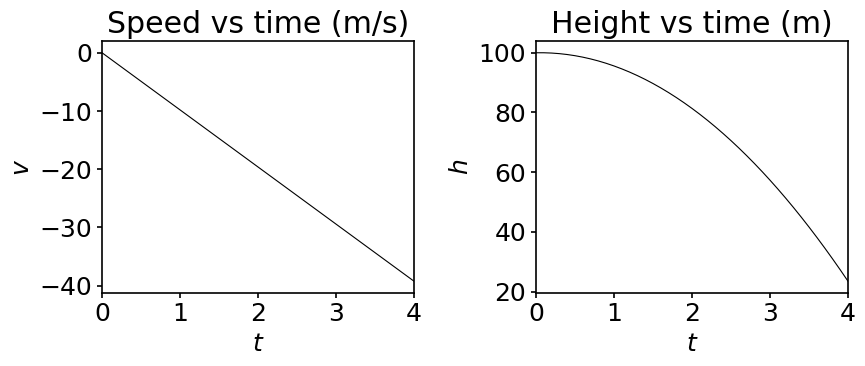

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(9, 4))

# We, of course, now access different sub-
# plots as the elements of a numpy array.
ax[0].plot(t, y[:, 1], '-k', lw=0.8)

# Here we limit the x-axis strictly to
# the domain in which t is defined, and
# demonstrate a VERY IMPORTANT FEATURE OF
# SEQUENCES IN PYTHON. It is the possi-
# bility of negative indexing, which is
# absent in many other programming langu-
# ages. When the a negative index is
# provided to a sequence in Python, then
# the element returned is 'counted' from the end
# of the array. t[-1] refers to the last
# element of t. The logic behind this is that
# t[0] corresponds to the first element of the
# array so that going on step back brings you to
# the end of the array in a cyclic fashion.
# This is a very useful feature, which
# spares you the necessity to even care
# about how many elements your sequence
# contains.
#
# For more info
# http://wordaligned.org/articles/negative-sequence-indices-in-python
ax[0].set_xlim(t[0], t[-1])

ax[0].set_xlabel('$t$')
ax[0].set_ylabel('$v$')
ax[0].set_title('Speed vs time (m/s)')

ax[1].plot(t, y[:, 0], '-k', lw=0.8)

ax[1].set_xlim(t[0], t[-1])

ax[1].set_xlabel('$t$')
ax[1].set_ylabel('$h$')
ax[1].set_title('Height vs time (m)')

In the above plots we have explicitly changed our usual plotting style: we used a thin black line. We do so to show you how to set those two parameters but for nearly all our plots we rely on our matplotlib style file. We advise you to do the same to keep the appearance of your plots consistent. But feel free to edit any style file according to your taste!

### Numerical stability of the forward Euler method revisited

Let's consider another two dimensional example and analyze the motion of an object attached to a spring. The equation of motion reads:

```{math}
:label: eq:spring
    m\frac{d^2 x}{d t^2}=-kx,
```

where $x$ is the position of the object with respect to its equilibrium position and $k>0$ is the spring constant. Introducing the velocity $v=dx/dt$, this equation is equivalent to the following system:

```{math}
    & \frac{dx}{dt}=v,\\
    & \frac{dv}{dt}=-\gamma^2 x,
```
with $\gamma =\sqrt{k/m}$.

For the forward Euler scheme we have:

```{math}
\begin{pmatrix}
    x^{n+1} \\
    v^{n+1}
\end{pmatrix}
=
\begin{pmatrix}
    x^{n} \\
    v^{n}
\end{pmatrix}
+&
\begin{pmatrix}
    0 & 1 \\
    -\gamma^2 & 0
\end{pmatrix}
\begin{pmatrix}
    x^{n} \\
    v^{n}
\end{pmatrix}
dt
```

It does not seem very different from the previous problem so let's implement this.

In [15]:
k = 2.    # spring constant
m = 1.    # object's mass
x0 = 0.75 # initial position
v0 = 0.   # initial velocity
ti = 0.   # initial time
tf = 40.0 # final time at which the solution is computed
dt = 0.15 # time step

In [16]:
# Let's first compute gamma and the number
# of time steps.
gamma = np.sqrt(k/m)
nt = int((tf-ti)/dt)

# Create a numpy array containing the
# intermediate values of y, including
# those at ti and tf.
y = np.empty((nt+1, 2))

# Store initial condition in the first row
# of y.
y[0] = x0, v0

# Create matrix L.
L = np.array([[0., 1.], [-gamma**2, 0.]])

# Perform the time stepping.
for i in range(nt):
    y[i+1] = y[i] + np.dot(L, y[i])*dt

In [17]:
# Store nt time steps.
t = np.arange(nt+1) * dt

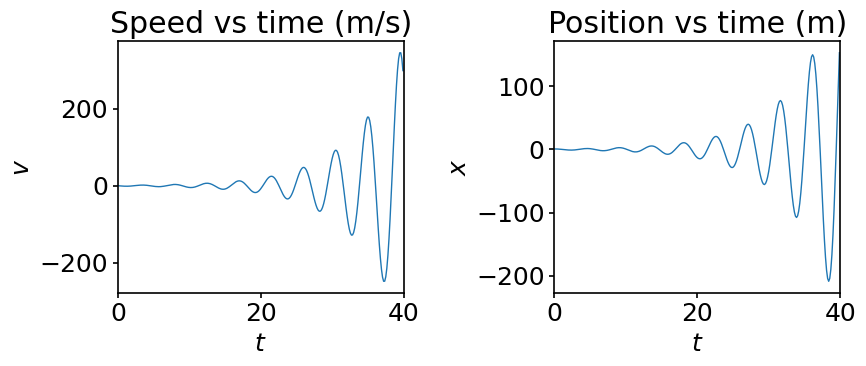

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(9, 4))

ax[0].plot(t, y[:, 1])

ax[0].set_xlabel('$t$')
ax[0].set_ylabel('$v$')
ax[0].set_title('Speed vs time (m/s)')

ax[1].plot(t, y[:, 0])

ax[1].set_xlabel('$t$')
ax[1].set_ylabel('$x$')
ax[1].set_title('Position vs time (m)')

# Here we take advantage of that we
# store both axes objects in one vari-
# ables - we don't have to restrict the
# limits for each of them separately,
# as we can iterate over the members
# of the sequence - makes the code shorter.
for axis in ax:
    axis.set_xlim(0, 40.)

Do you see something strange? We know that a frictionless harmonic oscillator, like the one we are considering, must oscillate back and forth with a constant amplitude. So, what exactly went wrong?

Let's inspect the forward Euler scheme stability for the system we are solving. In order to decouple equations for $x^{n+1}$ and $v^{n+1}$, we compute the eigenvalues $\lambda_i$ and eigenvectors $v_i$ of the matrix

```{math}
L=
\begin{pmatrix}
    0 & 1 \\
    -\gamma^2 & 0
\end{pmatrix},
```

and get:

```{math}
\lambda_1 = i\gamma,\;\; \lambda_2=-i\gamma,\;\;
v_1 =
\begin{pmatrix}
    1 \\
    i\gamma
\end{pmatrix},
\;\;
v_2 =
\begin{pmatrix}
    1 \\
    -i\gamma
\end{pmatrix}.
```

The matrix $L$ can then be decomposed as,

```{math}
L=Q\Lambda Q^{-1}\; \hbox{with,} \;\;
\Lambda =
\begin{pmatrix}
    i\gamma & 0 \\
    0 & -i\gamma
\end{pmatrix} \;\; \hbox{and} \;\;
Q=
\begin{pmatrix}
   1 & 1 \\
    i\gamma & -i\gamma
\end{pmatrix}.
```

Using the vector notation $y=(x\;\; v)$, we can then reformulate our time advancement scheme as,

```{math}
:label: eq:eigenCoor
y^{n+1} = y^{n}+ Ly^{n}dt\;\; & \Leftrightarrow \;\; Q^{-1}y^{n+1} = Q^{-1}y^{n} + Q^{-1}Ly^{n}dt \\
& \Leftrightarrow \;\; z^{n+1} = z^{n} + \Lambda z^{n}dt.
```

In the last equation, $z=(z_1\;\; z_2)$ are the coordinates in the eigenvector basis $y=z_1(t) v_1 + z_2(t) v_2$. In this basis, the system of equation is decoupled and reads:

```{math}
    & z_1^{n+1} = z_1^{n} + i\gamma z_1^{n} dt\\
    & z_2^{n+1} = z_2^{n} - i\gamma z_2^{n} dt
```

It is now clear why the forward Euler scheme displays the diverging behaviour observed in the plots. The coefficients present in the advancement scheme are both purely imaginery and we have seen above that their product with $dt$ necessarily lies outside of the domain of stability of the scheme. Therefore, we cannot avoid the divergence of our solution by taking even a very small time step. The forward Euler scheme is, therefore, not adapted to the simulation of a simple harmonic oscillator.

## The backward Euler method

The explicit Euler method gives a decent approximation in certain cases ({eq}`eq:decay`), but it is absolutely inapplicable in others since it blows up for *any* time step ({eq}`eq:spring`). It urges us to search for different ways to approximate evolution equations. One of them is the *implicit* Euler method.

Similarly to the explicit Euler method which is also referred to as the forward Euler method, the implicit Euler method is sometimes called the backward Euler method. Generally speaking, the difference between explicit and implicit numerical schemes is that in the first case the solution at latter point of the dependant variable (at a later time, for example) is built from the solution computed at the previous points; in the second case, the algorithm involves *both* the solution previous points and later points. Schematically we have:

```{math}
& y^{n+1}(t) = f\Big(y^n, y^{n-1}, \ldots, y^0\Big),\;\; & \hbox{Explicit scheme}, \\
& g\Big(y^{n+1}, y^n, y^{n-1}, \ldots, y^0 \Big) = 0,\;\; & \hbox{Implicit scheme}.
```

The time advancement with the implicit Euler scheme is as follows:
```{math}
y^{n+1} = y^n + dt f(y^{n+1}, t^{n+1}).
```

The advantage of implicit schemes over explicit ones is that usually they allow a larger time step to be stable. They are then useful when dealing with a *stiff* problem. The problem is called stiff if its solution varies rapidly in time, so that certain numerical schemes require an extremely small time step for stability.

We computed the region of stability of the explicit Euler for linear autonomous homogeneous problems, like radioactive decay {eq}`eq:decay` or the movement of a mass attached to a spring {eq}`eq:spring`. Let's compare the situation when using the implicit Euler for both of them.

We first consider radioactive decay {eq}`eq:decay`. The one-step advancement is given by:
```{math}
N^{n+1} = (1+\alpha dt)^{-1}N^n.
```

Let's solve the equation for some input parameters and visualize the solution.

In [19]:
# We redefine all the constants. Even though
# they were defined in the above cell, some
# got overwritten when solving other problems.
alpha = 0.25 # Exponential law coeffecient
ti = 0.0     # Initial time
tf = 15.0    # Final time
dt = 1.      # Time step
Ni = 100     # Initial condition

In [20]:
nt = int((tf-ti)/dt)

# Let us also redefine the array storing N, so that it contains
# both the solution predicted by the
# implicit and explicit schemes in two columns.
N = np.empty((nt+1, 2))

# We copy initial condition into both columns.
N[0] = Ni, Ni

# Define one-time step advancement coefficient
# assumed by the implicit Euler outside of the
# loop, as it is independant of t.
# If some computation is independant of the iteration index,
# try to ALWAYS take it out of the loop. Otherwise,
# you are performing useless repetitive computations,
# and simply waste time.
coef_imp = (1.+alpha*dt)**(-1)

# Advance solution both with the implicit and
# explicit schemes.
for i in range(nt):
    N[i+1, 0] = N[i, 0] - alpha*N[i, 0]*dt

    N[i+1, 1] = coef_imp*N[i, 1]

In [21]:
# t and Nexact have to be recomputed, as we
# have a newly defined tf.
t = np.arange(nt+1) * dt

Nexact = Ni * np.exp(-alpha*t)

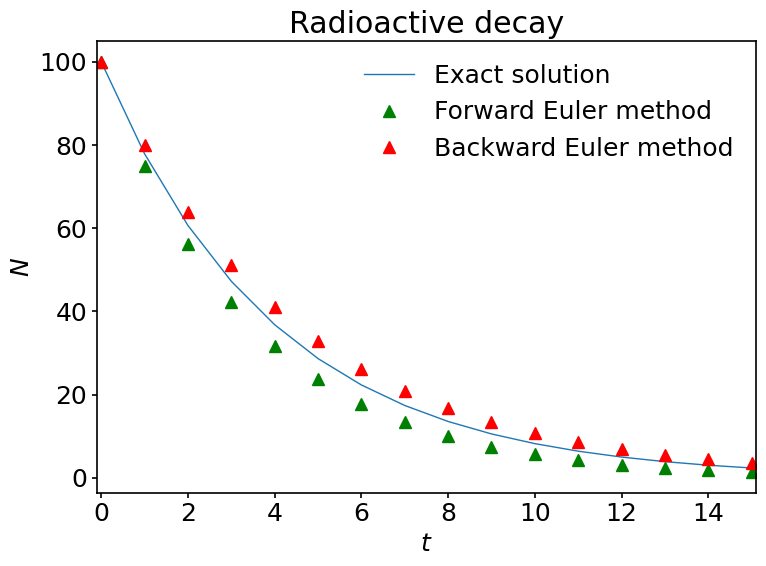

In [22]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(t, Nexact, label='Exact solution')

ax.plot(t, N[:, 0], '^', color='green', label='Forward Euler method')
ax.plot(t, N[:, 1], '^', color=(1., 0., 0.), label='Backward Euler method')

ax.set_xlim(t[0]-0.1, t[-1]+0.1)

# We set labels for the axes and title of a subplot.
ax.set_xlabel('$t$')
ax.set_ylabel('$N$')
ax.set_title('Radioactive decay')

# Make the legend visible.
ax.legend();

Here we observe some interesting things. The solutions predicted by the explicit and implicit Euler schemes differ noticably. Even though they are both of the same order of accuracy, they are obviously not identical and the implicit Euler scheme matches the exact solution a bit better. Also, for the chosen time step, both methods are stable in this case.

Let us now go back to the equation {eq}`eq:spring`. We have proved that the forward Euler method is unstable for this case. Let us now check what happens with the backward Euler method.

For this problem, the scheme reads:
```{math}
\begin{pmatrix}
    x^{n+1} \\
    v^{n+1}
\end{pmatrix}
=
\begin{pmatrix}
    x^{n} \\
    v^{n}
\end{pmatrix}
+&
\begin{pmatrix}
    0 & 1 \\
    -\gamma^2 & 0
\end{pmatrix}
\begin{pmatrix}
    x^{n+1} \\
    v^{n+1}
\end{pmatrix}
dt.
```

After a little rearrangement:
```{math}
\begin{pmatrix}
1 & -dt\\
\gamma^2 dt & 1
\end{pmatrix}
\begin{pmatrix}
    x^{n+1} \\
    v^{n+1}
\end{pmatrix}
= \begin{pmatrix}
    x^{n} \\
    v^{n}
\end{pmatrix},
```

and finally:
```{math}
\begin{pmatrix}
    x^{n+1} \\
    v^{n+1}
\end{pmatrix}
= \begin{pmatrix}
1 & -dt\\
\gamma^2 dt & 1
\end{pmatrix}^{-1}
\begin{pmatrix}
    x^{n} \\
    v^{n}
\end{pmatrix}.
```

Let's implement this method in a code:

In [23]:
# We have to redefine time parameters
# again, as they got overwritten.
ti = 0.    # initial time
tf = 40.0  # final time at which the solution is computed
dt = 0.15  # time step

In [24]:
# Recompute the number of time steps and
# the time array.
nt = int((tf-ti)/dt)

t = np.arange(nt+1) * dt

In [25]:
y_imp = np.empty((nt+1, 2))

# Store initial condition in the first row
# of y.
y_imp[0] = x0, v0

# As the matrix that advances the solution
# does not depend on t, we compute it
# right away.
# To do this, we use the linalg.inv function of numpy.
#
# For more info
# https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html
L_imp = np.linalg.inv(np.array([[1., -dt], [gamma**2*dt, 1.]]))

# Perform the time stepping. dt is hidden
# in L_imp, so it does appear here.
for i in range(nt):
    y_imp[i+1] = np.dot(L_imp, y_imp[i])

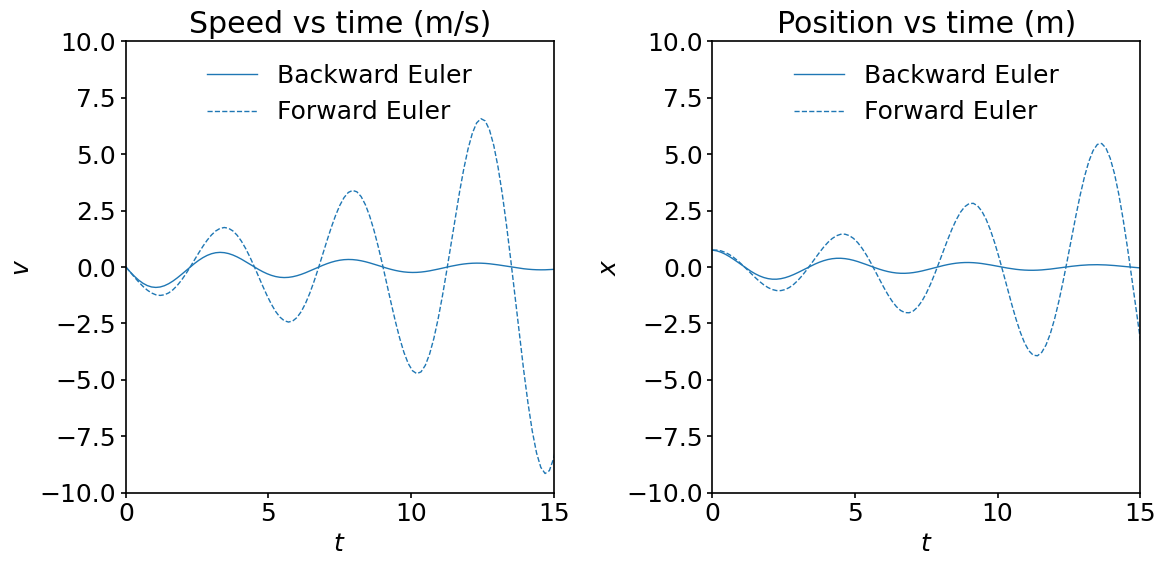

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].plot(t, y_imp[:, 1], label='Backward Euler')
ax[0].plot(t, y[:, 1], '--', label='Forward Euler')

ax[0].set_xlabel('$t$')
ax[0].set_ylabel('$v$')
ax[0].set_title('Speed vs time (m/s)')

ax[1].plot(t, y_imp[:, 0], label='Backward Euler')
ax[1].plot(t, y[:, 0], '--', label='Forward Euler')

ax[1].set_xlabel('$t$')
ax[1].set_ylabel('$x$')
ax[1].set_title('Position vs time (m)')

for axis in ax:
    axis.set_xlim(0, 15)
    axis.set_ylim(-10, 10)
    axis.legend(loc='upper center')

Obviously, the implicit Euler method does not blow up, but the solution is damped quickly. This a consequence of the numerical error being accumulated after $N$ time steps and the large $dt$ used.

Let's compute the region of stability of the implicit Euler scheme.

The problem we are solving can be written as follows:
```{math}
:label: eq:generic
y^{n+1} = \sigma y^{n} = \sigma^{n+1} y^{0}.
```

In the case of the implicit Euler scheme we have:
```{math}
:label: eq:back_stab_sigma
\sigma = (1-\lambda dt)^{-1} = (1-\lambda_r dt - i\lambda_i dt)^{-1}.
```

We can write the denominator of {eq}`eq:back_stab_sigma` in a trigonometric form:
```{math}
\sigma = Ae^{i\phi},
```

where $A = 1/r = ((1-\lambda_r dt)^2 + \lambda_i^2 dt^2)^{-1/2}$.

Stability then requires:
```{math}
:label: eq:back_stab
\vert \sigma \vert = A\vert e^{i\phi} \vert = A \le 1 \Rightarrow (1-\lambda_r dt)^2 + \lambda_i^2 dt^2 \ge 1.
```

Condition {eq}`eq:back_stab` implies that the region of stability of the implicit Euler is *outside* of the circle of radius 1 centered at $\lambda_r dt=1$ and $\lambda_i dt=0$, which is, obviously, an infinite domain.

In the literature you will often encounter the statement that *the implicit Euler scheme is unconditionally stable* for linear autonomous homogeneous problems. You might think that this contradicts {eq}`eq:back_stab`, but in fact, when stating so, people usually imply that $\lambda_r \le 0$, so that the equation {eq}`eq:generic` only admits decaying solutions.

## Summary

In this notebook we have described the forward and the backward Euler schemes, and how we can discretize an ordinary differential equation (or a system of ODEs) to compute the time evolution of the physical quantities under consideration.

We computed the accuracy of the Euler method, and introduced the concept of stability of a numerical scheme. The former results directly from the number of terms retained in the Taylor expansion of the variables, while the latter originates from the structure of the time advancement scheme and the eigenvalues of the rhs linear operator appearing in the discretized equations.

In the next notebook, we introduce some more efficient time advancement schemes which have both better accuracy and larger domains of stability. They are know as Runge-Kutta schemes and we will use them extensively when analyzing partial differential equations later on in the course.